In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./dataset/listings2.csv', encoding='Latin-1')

/Users/Kenny/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,NaN,NaN,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.51


In [4]:
list(df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49056 entries, 0 to 49055
Data columns (total 96 columns):
id                                  49056 non-null int64
listing_url                         49056 non-null object
scrape_id                           49056 non-null int64
last_scraped                        49056 non-null object
name                                49039 non-null object
summary                             47140 non-null object
space                               34354 non-null object
description                         48522 non-null object
experiences_offered                 49056 non-null object
neighborhood_overview               29889 non-null object
notes                               20013 non-null object
transit                             30935 non-null object
access                              28549 non-null object
interaction                         27835 non-null object
house_rules                         29660 non-null object
thumbnail_url          

## Cleaning

In [6]:
# drop columns
df.drop(['scrape_id', 'last_scraped', 'experiences_offered', 'host_response_rate', 'host_acceptance_rate', 
        'weekly_price', 'monthly_price','requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready'], axis=1)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,...,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","Diverse. Great coffee shops and restaurants, n...",NaN,"Yes! B, C, and 1 trains are within 5 minute w...",Guests have access to the whole apartment: wi...,...,10.0,10.0,10.0,10.0,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",...,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,I love that the neighborhood is safe to walk a...,NaN,You have access to local trains and express li...,guest will have access to the common living qu...,...,10.0,10.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1,0.51
5,3330,https://www.airbnb.com/rooms/3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,The apartment is equipped with full kitchen (m...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0.35
6,21794,https://www.airbnb.com/rooms/21794,COZY QUIET room 4 DOOGLERS!,"It's comfy & has a loft bed & a chaise lounge,...",This is the smaller room of the two I have ava...,"It's comfy & has a loft bed & a chaise lounge,...",GREAT Central Location. On 15th street between...,Chelsea is a great area of town central to eve...,Central location. The A and CC 8th ave subway ...,Your own very private room immediately when th...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.25
7,3647,https://www.airbnb.com/rooms/3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,NaN
8,22911,https://www.airbnb.com/rooms/22911,The Stuydio Modern and Light Filled,"Make your NY story in our welcoming, home away...",Welcome to The Stuydio! As featured in The New...,"Make your NY story in our welcoming, home away...","Beautiful and hi

In [7]:
# drop $ and , 
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(float)
df['price']

0         59.0
1        140.0
2        149.0
3        225.0
4         89.0
5         70.0
6        111.0
7        150.0
8        125.0
9         60.0
10        89.0
11       175.0
12        80.0
13       125.0
14        65.0
15       185.0
16       240.0
17        60.0
18        79.0
19       500.0
20        79.0
21       101.0
22       220.0
23       126.0
24       125.0
25       150.0
26       139.0
27       135.0
28       110.0
29       100.0
         ...  
49026     45.0
49027    115.0
49028     85.0
49029    125.0
49030     36.0
49031    250.0
49032     69.0
49033    195.0
49034    100.0
49035    250.0
49036     65.0
49037    118.0
49038     99.0
49039    205.0
49040     70.0
49041     35.0
49042     35.0
49043    115.0
49044    150.0
49045    138.0
49046     58.0
49047    200.0
49048    178.0
49049    120.0
49050    288.0
49051     60.0
49052     65.0
49053    135.0
49054    350.0
49055     60.0
Name: price, Length: 49056, dtype: float64

In [8]:
# dates
df['host_since_year'] = pd.DatetimeIndex(df['host_since']).year
df['host_since_year'].dropna()

0        2008.0
1        2009.0
2        2008.0
3        2008.0
4        2010.0
5        2008.0
6        2010.0
7        2008.0
8        2010.0
9        2009.0
10       2008.0
11       2009.0
12       2009.0
13       2010.0
14       2009.0
15       2009.0
16       2010.0
17       2009.0
18       2009.0
19       2010.0
20       2009.0
21       2010.0
22       2010.0
23       2009.0
24       2010.0
25       2009.0
26       2010.0
27       2009.0
28       2009.0
29       2010.0
          ...  
49026    2018.0
49027    2016.0
49028    2016.0
49029    2018.0
49030    2013.0
49031    2011.0
49032    2017.0
49033    2018.0
49034    2018.0
49035    2015.0
49036    2018.0
49037    2013.0
49038    2015.0
49039    2014.0
49040    2015.0
49041    2016.0
49042    2016.0
49043    2014.0
49044    2014.0
49045    2013.0
49046    2016.0
49047    2018.0
49048    2013.0
49049    2013.0
49050    2013.0
49051    2016.0
49052    2018.0
49053    2018.0
49054    2012.0
49055    2016.0
Name: host_since_year, L

In [9]:
#host_r_time = {'N/A': 0, 'within a day': 1, 'within a few hours': 2,'within an hour':3}
#df['host_response_time'] = [host_r_time[item] for item in df['host_response_time']]
#df['host_response_time'].fillna(0)
#print(df['host_response_time'])

In [10]:
# convert host_response_time string to an int rating of 0-3
df['host_response_time'].fillna(0, inplace=True)
df.host_response_time[df.host_response_time == 'N/A'] = 0
df.host_response_time[df.host_response_time == 'within an hour'] = 1
df.host_response_time[df.host_response_time == 'within a few hours'] = 2
df.host_response_time[df.host_response_time == 'within a day'] = 3
df.host_response_time

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """

0        2
1        3
2        1
3        2
4        0
5        3
6        1
7        0
8        1
9        2
10       1
11       2
12       2
13       0
14       0
15       3
16       1
17       3
18       3
19       1
20       0
21       1
22       1
23       3
24       1
25       3
26       0
27       3
28       1
29       0
        ..
49026    0
49027    1
49028    1
49029    0
49030    1
49031    0
49032    0
49033    0
49034    1
49035    0
49036    0
49037    0
49038    0
49039    0
49040    0
49041    1
49042    1
49043    0
49044    0
49045    0
49046    0
49047    0
49048    0
49049    0
49050    0
49051    0
49052    1
49053    1
49054    0
49055    0
Name: host_response_time, Length: 49056, dtype: object

In [11]:
# drop % && convert to float
df['host_response_rate'].fillna(0, inplace=True)
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace(',', '')
df['host_response_rate'] = df['host_response_rate'].str.strip()
df['host_response_rate'] = df['host_response_rate'].astype(float)
df['host_response_rate']

0         70.0
1         80.0
2        100.0
3         82.0
4          0.0
5        100.0
6        100.0
7          0.0
8        100.0
9        100.0
10       100.0
11        90.0
12       100.0
13         0.0
14         0.0
15        90.0
16       100.0
17       100.0
18        80.0
19       100.0
20         0.0
21       100.0
22       100.0
23        80.0
24       100.0
25        89.0
26         0.0
27        86.0
28       100.0
29         0.0
         ...  
49026      0.0
49027    100.0
49028    100.0
49029      0.0
49030    100.0
49031      0.0
49032      0.0
49033      0.0
49034    100.0
49035      0.0
49036      0.0
49037      0.0
49038      0.0
49039      0.0
49040      0.0
49041    100.0
49042    100.0
49043      0.0
49044      0.0
49045      0.0
49046      0.0
49047      0.0
49048      0.0
49049      0.0
49050      0.0
49051      0.0
49052     88.0
49053    100.0
49054      0.0
49055      0.0
Name: host_response_rate, Length: 49056, dtype: float64

In [12]:
# host_is_superhost
df.host_is_superhost[df.host_is_superhost == 't'] = 1
df.host_is_superhost[df.host_is_superhost == 'f'] = 0
df.host_is_superhost.astype(float)
df.host_is_superhost

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        1
1        0
2        1
3        0
4        0
5        0
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       1
26       0
27       0
28       1
29       1
        ..
49026    0
49027    0
49028    0
49029    0
49030    0
49031    0
49032    0
49033    0
49034    0
49035    0
49036    0
49037    0
49038    0
49039    0
49040    0
49041    0
49042    0
49043    0
49044    0
49045    0
49046    0
49047    0
49048    0
49049    0
49050    0
49051    0
49052    0
49053    0
49054    0
49055    0
Name: host_is_superhost, Length: 49056, dtype: object

In [13]:
# host_identity_verified
df.host_identity_verified[df.host_identity_verified == 't'] = 1
df.host_identity_verified[df.host_identity_verified == 'f'] = 0
df.host_identity_verified.astype(float)
df.host_identity_verified 

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        1
1        1
2        1
3        1
4        1
5        1
6        0
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       1
21       1
22       0
23       1
24       1
25       1
26       1
27       1
28       1
29       0
        ..
49026    0
49027    0
49028    0
49029    0
49030    1
49031    0
49032    0
49033    0
49034    0
49035    0
49036    0
49037    1
49038    1
49039    1
49040    1
49041    0
49042    0
49043    1
49044    1
49045    0
49046    0
49047    0
49048    0
49049    1
49050    0
49051    0
49052    0
49053    0
49054    0
49055    0
Name: host_identity_verified, Length: 49056, dtype: object

In [14]:
threshold=10
df['count'] = df.groupby('property_type')['property_type'].transform(pd.Series.value_counts)
df=df[df['count']>=threshold]
df.drop(['count'], axis = 1, inplace = True)


In [15]:
df['property_type'].value_counts()

Apartment             39301
House                  3527
Townhouse              1652
Loft                   1535
Condominium            1359
Serviced apartment      691
Guest suite             258
Other                   129
Boutique hotel          112
Bed and breakfast       111
Resort                   89
Hotel                    75
Guesthouse               56
Hostel                   48
Bungalow                 29
Villa                    25
Tiny house               13
Aparthotel               12
Name: property_type, dtype: int64

In [16]:
# potential columns to clean: host_verification, is_location_exact,

## Analysis

In [17]:
neighbourhood_cleansed = df['neighbourhood_cleansed'].value_counts()
neighbourhood_cleansed

Williamsburg                  4102
Bedford-Stuyvesant            3568
Harlem                        2745
Bushwick                      2406
Hell's Kitchen                2076
Upper West Side               2066
East Village                  1992
Upper East Side               1906
Midtown                       1658
Crown Heights                 1582
Chelsea                       1158
Greenpoint                    1151
East Harlem                   1132
Lower East Side                950
Astoria                        890
Washington Heights             860
West Village                   837
Flatbush                       619
Financial District             608
Clinton Hill                   599
Prospect-Lefferts Gardens      548
Park Slope                     517
Long Island City               498
Murray Hill                    497
Kips Bay                       487
Fort Greene                    456
Flushing                       416
Greenwich Village              415
Gramercy            

In [18]:
accommodates = df['accommodates'].value_counts()
accommodates

2     22064
4      7526
1      7263
3      5684
6      2457
5      2057
8       711
7       484
10      277
16      136
9       131
12      125
11       40
14       37
15       18
13       12
Name: accommodates, dtype: int64

In [19]:
# convert column to string
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(float)
df['price']

0         59.0
1        140.0
2        149.0
3        225.0
4         89.0
5         70.0
6        111.0
7        150.0
8        125.0
9         60.0
10        89.0
11       175.0
12        80.0
13       125.0
14        65.0
15       185.0
16       240.0
17        60.0
18        79.0
19       500.0
20        79.0
21       101.0
22       220.0
23       126.0
24       125.0
25       150.0
26       139.0
27       135.0
28       110.0
29       100.0
         ...  
49026     45.0
49027    115.0
49028     85.0
49029    125.0
49030     36.0
49031    250.0
49032     69.0
49033    195.0
49034    100.0
49035    250.0
49036     65.0
49037    118.0
49038     99.0
49039    205.0
49040     70.0
49041     35.0
49042     35.0
49043    115.0
49044    150.0
49045    138.0
49046     58.0
49047    200.0
49048    178.0
49049    120.0
49050    288.0
49051     60.0
49052     65.0
49053    135.0
49054    350.0
49055     60.0
Name: price, Length: 49022, dtype: float64

In [20]:
df.sort_values(['neighbourhood_cleansed', 'accommodates'], ascending=[True, False])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_year
35418,23139647,https://www.airbnb.com/rooms/23139647,20181206022948,2018-12-06,Comfy home for NYC groups near Botanical Garden,Private rental of 2 levels of a private house ...,"***** Please provide the purpose of your trip,...",Private rental of 2 levels of a private house ...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.99,2014.0
39846,26255080,https://www.airbnb.com/rooms/26255080,20181206022948,2018-12-06,â¥â¥â¥ Entire House with Backyard & Superfa...,Entire spacious duplex level apartment with 4 ...,All the details are below so that will see all...,Entire spacious duplex level apartment with 4 ...,none,With its blend of white-collar and blue-collar...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,2.85,2018.0
440,182177,https://www.airbnb.com/rooms/182177,20181206022948,2018-12-06,PRIVATE FLAT / APARTMENT- $SPECIAL$,First floor 1-bedroom Flat; includes a kitchen...,Our apartment is a Wireless Internet equipped ...,First floor 1-bedroom Flat; includes a kitchen...,none,Situated right in the heart of the Bronx where...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,3,2.93,2011.0
25494,17876530,https://www.airbnb.com/rooms/17876530,20181206022948,2018-12-06,Spacious Garden Apartment Private Entrance,Entire Spacious Garden level apartment with a ...,"**** Please provide the purpose of your trip, ...",Entire Spacious Garden level apartment with a ...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,3.37,2014.0
7928,5046189,https://www.airbnb.com/rooms/5046189,20181206022948,2018-12-06,Courtyard Studio,IN THE HEART OF THE GREAT ITALIAN NEIGHBORHOOD...,NO OTHER LISTING IN NYC LIKE THIS . YOUR OWN H...,IN THE HEART OF THE GREAT ITALIAN NEIGHBORHOOD...,none,IN THE HEART OF THE GREAT ITALIAN NEIGHBORHOOD...,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,0.95,2014.0
12169,8294259,https://www.airbnb.com/rooms/8294259,20181206022948,2018-12-06,Room in Private House(Queen Bed) by Montefiore...,Private room with a comfy Queen size bed for o...,NaN,Private room with a comfy Queen size bed for o...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,moderate,f,f,5,1.02,2014.0
17604,12496118,https://www.airbnb.com/rooms/12496118,20181206022948,2018-12-06,Entire Home in NYC- 1 bedroom/ Private Entrance,Entire Apartment with a comfy Queen size bed f...,"***** Please provide the purpose of your trip,...",Entire Apartment with a comfy Queen size bed f...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.95,2014.0
32635,21830694,https://www.airbnb.com/rooms/21830694,20181206022948,2018-12-06,A Piece of mind in the city,Looking for a decent place to stay and affordi...,NaN,Looking for a decent place to stay and affordi...,none,NaN,...,NaN,NaN,t,f,flexible,f,f,1,0.56,2016.0
40337,26552340,https://www.airbnb.com/rooms/26552340,20181206022948,2018-12-06,*NYC Flat Cozy Private Room w/ AC & Blazin' WiFi*,Hotel-style private room with bed in spacious ...,All the details are below so that will see all...,Hotel-style private room with bed in spacious ...,none,With its blend of white-collar and blue-collar...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,1.09,2018.0
46097,29674940,https://www.airbnb.com/rooms/29674940,20181206022948,2018-12-06,Sunlit Backyard in NYC + Walk to Zoo and Gardens!,"Beautiful area close to Botanical Gardens, Bro...",NaN,"Beautiful area close to Botanical Gardens, Bro...",none,NaN,...,NaN,NaN,t,f,flexible,f,f,1,NaN,2016.0


In [21]:
import math

median_beds = math.floor(df.beds.median())
median_bedrooms = math.floor(df.bedrooms.median())
median_bathrooms = math.floor(df.bathrooms.median())

df['beds'] = df['beds'].fillna(value=median_beds)
df['bedrooms'] = df['bedrooms'].fillna(value=median_bedrooms)
df['bathrooms'] = df['bathrooms'].fillna(value=median_bathrooms)

In [22]:
neighbourhood_cleansed_accommodates_price = df[['neighbourhood_cleansed','accommodates', 'price', 'beds', 'bedrooms', 'bathrooms']]
neighbourhood_cleansed_accommodates_price

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
0,Harlem,3,59.0,2.0,1.0,1.0
1,Upper West Side,2,140.0,1.0,1.0,1.0
2,Kensington,4,149.0,1.0,1.0,1.0
3,Midtown,2,225.0,1.0,0.0,1.0
4,Harlem,1,89.0,1.0,1.0,1.0
5,Williamsburg,2,70.0,1.0,1.0,1.0
6,Chelsea,2,111.0,1.0,1.0,1.0
7,Harlem,2,150.0,1.0,1.0,1.0
8,Bedford-Stuyvesant,4,125.0,3.0,1.0,1.0
9,Harlem,2,60.0,1.0,1.0,1.0


In [23]:
neighbourhood_cleansed_accommodates_price = neighbourhood_cleansed_accommodates_price.sort_values(['neighbourhood_cleansed', 'accommodates', 'price'])
neighbourhood_cleansed_accommodates_price

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
40633,Allerton,1,34.0,1.0,1.0,1.0
1259,Allerton,1,35.0,1.0,2.0,1.0
5348,Allerton,1,42.0,1.0,1.0,1.5
5415,Allerton,1,43.0,1.0,1.0,1.0
19977,Allerton,1,50.0,1.0,1.0,1.0
13895,Allerton,1,55.0,1.0,1.0,1.0
26892,Allerton,1,70.0,1.0,0.0,1.0
42424,Allerton,1,80.0,1.0,1.0,1.0
6884,Allerton,2,43.0,2.0,1.0,1.0
37833,Allerton,2,45.0,1.0,1.0,1.0


In [24]:
# williamsburg only 
neighbourhood_cleansed_accommodates_price_Williamsburg = neighbourhood_cleansed_accommodates_price.loc[neighbourhood_cleansed_accommodates_price['neighbourhood_cleansed'] == 'Williamsburg']
neighbourhood_cleansed_accommodates_price_Williamsburg

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
40274,Williamsburg,1,10.0,1.0,0.0,1.0
35853,Williamsburg,1,26.0,1.0,1.0,1.0
34954,Williamsburg,1,30.0,1.0,1.0,1.0
3407,Williamsburg,1,35.0,1.0,1.0,1.5
3878,Williamsburg,1,35.0,1.0,1.0,1.0
10774,Williamsburg,1,35.0,1.0,1.0,2.0
10801,Williamsburg,1,35.0,1.0,1.0,1.5
19041,Williamsburg,1,35.0,1.0,1.0,2.0
20996,Williamsburg,1,35.0,1.0,1.0,1.0
23128,Williamsburg,1,35.0,1.0,1.0,1.0


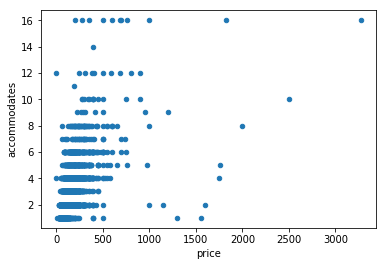

In [25]:
# extract 2018 room price analysis 
# neighbourhood_cleansed_accommodates_price
# plot results
neighbourhood_cleansed_accommodates_price_Williamsburg.plot.scatter('price', 'accommodates')

In [26]:
# williamsburg with 2 rooms only
neighbourhood_cleansed_accommodates_price_Williamsburg = neighbourhood_cleansed_accommodates_price_Williamsburg.loc[neighbourhood_cleansed_accommodates_price['accommodates'] == 2]
neighbourhood_cleansed_accommodates_price_Williamsburg

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
24849,Williamsburg,2,29.0,1.0,1.0,1.0
838,Williamsburg,2,30.0,1.0,1.0,1.0
21831,Williamsburg,2,35.0,1.0,1.0,4.0
24475,Williamsburg,2,35.0,1.0,1.0,1.0
21951,Williamsburg,2,37.0,1.0,1.0,4.0
15435,Williamsburg,2,38.0,1.0,1.0,1.0
21972,Williamsburg,2,39.0,1.0,1.0,4.0
8030,Williamsburg,2,40.0,1.0,1.0,1.0
16254,Williamsburg,2,40.0,1.0,1.0,1.0
20775,Williamsburg,2,40.0,1.0,1.0,1.0


In [27]:
# mean with neighbourhood_cleansed_accommodates_price 
neighbourhood_cleansed_accommodates_price_Williamsburg.mean()

accommodates      2.000000
price           111.126494
beds              1.045817
bedrooms          0.955179
bathrooms         1.080428
dtype: float64

In [28]:
neighbourhood_cleansed_accommodates_price.groupby(['neighbourhood_cleansed', 'accommodates']).size().loc['Allerton']

accommodates
1      8
2     12
3      4
4     10
7      1
8      1
10     1
11     1
dtype: int64

In [29]:
neighbourhood_cleansed_accommodates_price[neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == 'Allerton']

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
40633,Allerton,1,34.0,1.0,1.0,1.0
1259,Allerton,1,35.0,1.0,2.0,1.0
5348,Allerton,1,42.0,1.0,1.0,1.5
5415,Allerton,1,43.0,1.0,1.0,1.0
19977,Allerton,1,50.0,1.0,1.0,1.0
13895,Allerton,1,55.0,1.0,1.0,1.0
26892,Allerton,1,70.0,1.0,0.0,1.0
42424,Allerton,1,80.0,1.0,1.0,1.0
6884,Allerton,2,43.0,2.0,1.0,1.0
37833,Allerton,2,45.0,1.0,1.0,1.0


In [30]:
def findAveragePrice(location, guest):
    print(neighbourhood_cleansed_accommodates_price[(neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == location) & 
                                                    (neighbourhood_cleansed_accommodates_price.accommodates == guest)])

findAveragePrice('Allerton', 2)

      neighbourhood_cleansed  accommodates  price  beds  bedrooms  bathrooms
6884                Allerton             2   43.0   2.0       1.0        1.0
37833               Allerton             2   45.0   1.0       1.0        1.0
44955               Allerton             2   48.0   1.0       1.0        1.0
26888               Allerton             2   49.0   1.0       1.0        1.0
43152               Allerton             2   50.0   1.0       1.0        1.0
47797               Allerton             2   50.0   1.0       1.0        1.0
41610               Allerton             2   75.0   0.0       0.0        1.0
47454               Allerton             2   75.0   1.0       1.0        1.0
30495               Allerton             2   79.0   1.0       0.0        1.0
1804                Allerton             2   85.0   1.0       1.0        1.5
40345               Allerton             2  142.0   1.0       1.0        1.0
40378               Allerton             2  142.0   2.0       1.0        1.5

In [31]:
def findLocationPrice(location):
    return neighbourhood_cleansed_accommodates_price[(neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == location)]

findLocationPrice('Allerton')

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms
40633,Allerton,1,34.0,1.0,1.0,1.0
1259,Allerton,1,35.0,1.0,2.0,1.0
5348,Allerton,1,42.0,1.0,1.0,1.5
5415,Allerton,1,43.0,1.0,1.0,1.0
19977,Allerton,1,50.0,1.0,1.0,1.0
13895,Allerton,1,55.0,1.0,1.0,1.0
26892,Allerton,1,70.0,1.0,0.0,1.0
42424,Allerton,1,80.0,1.0,1.0,1.0
6884,Allerton,2,43.0,2.0,1.0,1.0
37833,Allerton,2,45.0,1.0,1.0,1.0


temp_array = []
def findPrice(location, guest):
    for i, row in neighbourhood_cleansed_accommodates_price.iterrows():
        if row['neighbourhood_cleansed'] == location and row['accommodates'] == guest:
            #print(row['neighbourhood_cleansed'], row['accommodates'], row['price'])
            temp_array.append[]

findPrice('Allertion', 2)

## Linear Regression

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df_test = findLocationPrice('Allerton')
df_test = df_test.drop(['neighbourhood_cleansed'], axis=1)
df_test

,accommodates,price,beds,bedrooms,bathrooms
40633,1,34.0,1.0,1.0,1.0
1259,1,35.0,1.0,2.0,1.0
5348,1,42.0,1.0,1.0,1.5
5415,1,43.0,1.0,1.0,1.0
19977,1,50.0,1.0,1.0,1.0
13895,1,55.0,1.0,1.0,1.0
26892,1,70.0,1.0,0.0,1.0
42424,1,80.0,1.0,1.0,1.0
6884,2,43.0,2.0,1.0,1.0
37833,2,45.0,1.0,1.0,1.0


In [33]:
reg = linear_model.LinearRegression()
reg.fit(df[['accommodates', 'beds', 'bedrooms', 'bathrooms']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
reg.coef_

array([38.52855732, -5.44441216,  7.37777287, 67.81850452])

In [35]:
reg.intercept_

-37.05843382143712

In [36]:
reg.predict([[2, 2, 1, 1]])

array([104.30613389])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[['accommodates', 'beds', 'bedrooms', 'bedrooms']],
    df['price'], test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.137142848056498

## Regularization

In [38]:
# Ridge regression
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.14019299826274612

In [39]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.13771393235095175

## Decision Tree

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [41]:
df_test

,accommodates,price,beds,bedrooms,bathrooms
40633,1,34.0,1.0,1.0,1.0
1259,1,35.0,1.0,2.0,1.0
5348,1,42.0,1.0,1.0,1.5
5415,1,43.0,1.0,1.0,1.0
19977,1,50.0,1.0,1.0,1.0
13895,1,55.0,1.0,1.0,1.0
26892,1,70.0,1.0,0.0,1.0
42424,1,80.0,1.0,1.0,1.0
6884,2,43.0,2.0,1.0,1.0
37833,2,45.0,1.0,1.0,1.0


In [42]:
df_features = df_test[['accommodates', 'beds', 'bedrooms', 'bathrooms']]
df_target = df_test['price']

In [43]:
feat_labels = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.4, random_state=0)

In [45]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('accommodates', 0.34031268883755994)
('beds', 0.25466620369650794)
('bedrooms', 0.228581770344377)
('bathrooms', 0.1764393371215527)


In [46]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.15)

In [47]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

accommodates
beds
bedrooms
bathrooms


In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [49]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.0

In [51]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.0

In [52]:
#google example

In [53]:
import sklearn.linear_model as sk
df['price'] = df['price'].astype(int)
df['beds'] = df['beds'].fillna(value=0)
df['bedrooms'] = df['bedrooms'].fillna(value=0)
df['bathrooms'] = df['bathrooms'].fillna(value=0)
predictors = df[['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'accommodates', 'price']]
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49022 entries, 0 to 49055
Data columns (total 8 columns):
latitude             49022 non-null float64
longitude            49022 non-null float64
bathrooms            49022 non-null float64
bedrooms             49022 non-null float64
beds                 49022 non-null float64
number_of_reviews    49022 non-null int64
accommodates         49022 non-null int64
price                49022 non-null int64
dtypes: float64(5), int64(3)
memory usage: 4.6 MB


In [54]:
X = df.drop('price', axis=1)
y = df['price']

In [55]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [56]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
#rfc_predict = rfc.predict(X_test)

ValueError: could not convert string to float: 'f'